# Recurrent Neural Networks

## Import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('../Data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, # 6 first lines
                 skipfooter=9, # 9 last lines
                 engine='python') # ???
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [5]:
# Converting string to date is very important in RNN!!!!
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments') # get Adjustment column to make index of dataframe
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


<AxesSubplot:xlabel='Adjustments'>

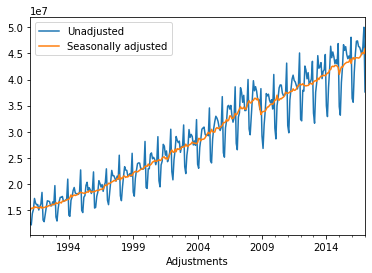

In [6]:
df.plot()

In [8]:
split_date = pd.Timestamp('01-01-2011') # Lấy mốc từ 2011 trở về trước làm bộ train

In [9]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

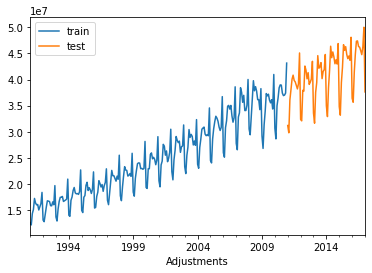

In [10]:
ax = train.plot() # return an axis object
test.plot(ax=ax)
plt.legend(['train', 'test'])

## Scaling, tách train-test

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler() # scalling

train_sc = sc.fit_transform(train) # ???
test_sc = sc.transform(test) # ???

In [12]:
train_sc[:4]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

In [13]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [16]:
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1) # don't know number of epochs

In [17]:
train_sc.shape

(240, 1)

In [18]:
# create new dataframes
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


## Tạo các rolling window có kích thước 12 tháng

In [19]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [20]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [21]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [22]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [30]:
X_train.shape

(228, 12)

In [24]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [25]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [28]:
X_train_t.shape

(228, 1, 12)

### Create model RNN

In [50]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [51]:
K.clear_session()
model = Sequential()
# Thêm lớp LSTM
model.add(LSTM(6, input_shape=(1, 12))) # số node cần điền là 6
# Thêm lớp DNN đầu ra
model.add(Dense(1))
# Thiết lập thông số
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 456       
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 1s 2ms/step - loss: 0.0555
Epoch 2/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 4/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 5/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 7/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 8/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 9/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 11/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/100


2/2 [==============================] - 0s 2ms/step


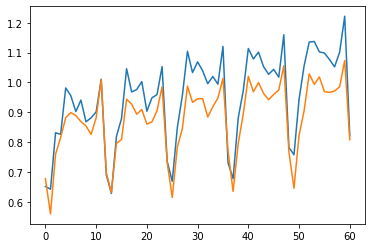

In [53]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.08388105344690869